## Introducción

### Objetivo del Proyecto

El objetivo principal de este proyecto es desarrollar un modelo de Machine Learning utilizando regresión lineal para predecir el número de pedidos que una empresa tienda recibirá. La predicción precisa de los pedidos permite a la empresa optimizar sus inventarios, mejorar la planificación de la producción y garantizar un mejor servicio al cliente.




# Preparacion del Ambiente


## importacion de librerias

In [ ]:
# Preparación de datos
import numpy as np
import pandas as pd

# Data Carga
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Carga de datos

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/examen3/datos/train_deliveries.csv")

In [ ]:
df


,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,product_count,region,delivery_fee
0,2009-01-01 01:15:22+00:00,-73.981918,40.779456,-73.957685,40.771043,2,Commercial,8.50
1,2009-01-01 01:59:17+00:00,-73.983759,40.721389,-73.994833,40.687179,2,Residence,13.00
2,2009-01-01 02:05:03+00:00,-73.956635,40.771254,-73.991528,40.749778,2,Others,10.60
3,2009-01-01 02:09:13+00:00,-73.984605,40.728020,-73.955746,40.776830,1,Others,12.20
4,2009-01-01 02:13:41+00:00,-73.980127,40.737425,-74.009544,40.726025,4,Residence,11.00
...,...,...,...,...,...,...,...,...
198954,2015-06-15 21:16:28+00:00,-73.870789,40.773670,-73.977699,40.761253,1,Residence,35.54
198955,2015-06-15 21:51:56+00:00,-73.968292,40.762054,-74.001129,40.718857,1,Manufacturing,13.50
198956,2015-06-15 22:21:40+00:00,-73.872726,40.773815,-73.983055,40.633411,2,Commercial,42.50
198957,2015-06-15 23:08:13+00:00,-74.007614,40.740753,-73.985573,40.744110,2,Residence,8.50


### Limpieza de datos

In [ ]:
df.shape

(198959, 8)

In [ ]:
df.columns

Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'product_count', 'region',
       'delivery_fee'],
      dtype='object')

In [ ]:
df.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
product_count          int64
region                object
delivery_fee         float64
dtype: object

### ajuste de fecha

In [ ]:
df_fecha=df

In [ ]:
df_fecha=df_fecha.drop('pickup_latitude', axis=1)
df_fecha=df_fecha.drop('dropoff_longitude', axis=1)
df_fecha=df_fecha.drop('dropoff_latitude', axis=1)
df_fecha=df_fecha.drop('product_count', axis=1)
df_fecha=df_fecha.drop('region', axis=1)
df_fecha=df_fecha.drop('pickup_longitude', axis=1)
df_fecha=df_fecha.drop('delivery_fee', axis=1)


In [ ]:
df_fecha['pickup_datetime'] = df_fecha['pickup_datetime'].str.slice(0, 10)


In [ ]:
df_fecha

,pickup_datetime
0,2009-01-01
1,2009-01-01
2,2009-01-01
3,2009-01-01
4,2009-01-01
...,...
198954,2015-06-15
198955,2015-06-15
198956,2015-06-15
198957,2015-06-15


In [ ]:
df_fecha.dtypes

pickup_datetime    object
dtype: object

In [ ]:
df_fecha['pickup_datetime'] = pd.to_datetime(df_fecha['pickup_datetime'])

### ajuste de la region con one hot encoder , contar ventas pedidas del tipo de region

In [ ]:
conteo = df['region'].value_counts()


In [ ]:
conteo

Manufacturing    49959
Commercial       49934
Others           49643
Residence        49423
Name: region, dtype: int64

In [ ]:
df_region=df

In [ ]:
df_region=df_region.drop('pickup_latitude', axis=1)
df_region=df_region.drop('dropoff_longitude', axis=1)
df_region=df_region.drop('dropoff_latitude', axis=1)
df_region=df_region.drop('product_count', axis=1)
df_region=df_region.drop('pickup_datetime', axis=1)
df_region=df_region.drop('pickup_longitude', axis=1)
df_region=df_region.drop('delivery_fee', axis=1)

In [ ]:
df_region=pd.get_dummies(df_region['region'])

In [ ]:
df_region

,Commercial,Manufacturing,Others,Residence
0,1,0,0,0
1,0,0,0,1
2,0,0,1,0
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
198954,0,0,0,1
198955,0,1,0,0
198956,1,0,0,0
198957,0,0,0,1


### conteo de productos comprados de la dependiendo de la region

In [ ]:
df

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,product_count,region,delivery_fee
0,2009-01-01 01:15:22+00:00,-73.981918,40.779456,-73.957685,40.771043,2,Commercial,8.50
1,2009-01-01 01:59:17+00:00,-73.983759,40.721389,-73.994833,40.687179,2,Residence,13.00
2,2009-01-01 02:05:03+00:00,-73.956635,40.771254,-73.991528,40.749778,2,Others,10.60
3,2009-01-01 02:09:13+00:00,-73.984605,40.728020,-73.955746,40.776830,1,Others,12.20
4,2009-01-01 02:13:41+00:00,-73.980127,40.737425,-74.009544,40.726025,4,Residence,11.00
...,...,...,...,...,...,...,...,...
198954,2015-06-15 21:16:28+00:00,-73.870789,40.773670,-73.977699,40.761253,1,Residence,35.54
198955,2015-06-15 21:51:56+00:00,-73.968292,40.762054,-74.001129,40.718857,1,Manufacturing,13.50
198956,2015-06-15 22:21:40+00:00,-73.872726,40.773815,-73.983055,40.633411,2,Commercial,42.50
198957,2015-06-15 23:08:13+00:00,-74.007614,40.740753,-73.985573,40.744110,2,Residence,8.50


In [ ]:
df_c=df

In [ ]:
df_c=df_c.drop('pickup_latitude', axis=1)
df_c=df_c.drop('dropoff_longitude', axis=1)
df_c=df_c.drop('dropoff_latitude', axis=1)

df_c=df_c.drop('pickup_datetime', axis=1)
df_c=df_c.drop('pickup_longitude', axis=1)
df_c=df_c.drop('delivery_fee', axis=1)

In [ ]:
df_c

,product_count,region
0,2,Commercial
1,2,Residence
2,2,Others
3,1,Others
4,4,Residence
...,...,...
198954,1,Residence
198955,1,Manufacturing
198956,2,Commercial
198957,2,Residence


In [ ]:
df_c = df_c.assign(count_commercial=0, count_residence=0, count_others=0, count_Manufactiring=0)


In [ ]:
def contar_por_tipoloc(row):
    if row['region'] == 'Commercial':
        row['count_commercial'] = row['product_count']
        row['count_residence'] = 0
        row['count_others'] = 0
        row['count_Manufactiring'] = 0
    elif row['region'] == 'Residence':
        row['count_residence'] = row['product_count']
        row['count_commercial'] = 0
        row['count_others'] = 0
        row['count_Manufactiring'] = 0
    elif row['region'] == 'Others':
        row['count_others'] = row['product_count']
        row['count_commercial'] = 0
        row['count_residence'] = 0
        row['count_Manufactiring'] = 0
    elif row['region'] == 'Manufacturing':
        row['count_Manufactiring'] = row['product_count']
        row['count_commercial'] = 0
        row['count_residence'] = 0
        row['count_others'] = 0
    return row

In [ ]:
df_c = df_c.apply(contar_por_tipoloc, axis=1)


In [ ]:
df_c

,product_count,region,count_commercial,count_residence,count_others,count_Manufactiring
0,2,Commercial,2,0,0,0
1,2,Residence,0,2,0,0
2,2,Others,0,0,2,0
3,1,Others,0,0,1,0
4,4,Residence,0,4,0,0
...,...,...,...,...,...,...
198954,1,Residence,0,1,0,0
198955,1,Manufacturing,0,0,0,1
198956,2,Commercial,2,0,0,0
198957,2,Residence,0,2,0,0


In [ ]:
df_c=df_c.drop('product_count', axis=1)
df_c=df_c.drop('region', axis=1)

In [ ]:
df_c

,count_commercial,count_residence,count_others,count_Manufactiring
0,2,0,0,0
1,0,2,0,0
2,0,0,2,0
3,0,0,1,0
4,0,4,0,0
...,...,...,...,...
198954,0,1,0,0
198955,0,0,0,1
198956,2,0,0,0
198957,0,2,0,0


### DF QUE GUARDE LAS LATITUDES

In [ ]:
df_lat=df

In [ ]:
df

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,product_count,region,delivery_fee
0,2009-01-01 01:15:22+00:00,-73.981918,40.779456,-73.957685,40.771043,2,Commercial,8.50
1,2009-01-01 01:59:17+00:00,-73.983759,40.721389,-73.994833,40.687179,2,Residence,13.00
2,2009-01-01 02:05:03+00:00,-73.956635,40.771254,-73.991528,40.749778,2,Others,10.60
3,2009-01-01 02:09:13+00:00,-73.984605,40.728020,-73.955746,40.776830,1,Others,12.20
4,2009-01-01 02:13:41+00:00,-73.980127,40.737425,-74.009544,40.726025,4,Residence,11.00
...,...,...,...,...,...,...,...,...
198954,2015-06-15 21:16:28+00:00,-73.870789,40.773670,-73.977699,40.761253,1,Residence,35.54
198955,2015-06-15 21:51:56+00:00,-73.968292,40.762054,-74.001129,40.718857,1,Manufacturing,13.50
198956,2015-06-15 22:21:40+00:00,-73.872726,40.773815,-73.983055,40.633411,2,Commercial,42.50
198957,2015-06-15 23:08:13+00:00,-74.007614,40.740753,-73.985573,40.744110,2,Residence,8.50


In [ ]:
df_lat=df_lat.drop('pickup_datetime', axis=1)
df_lat=df_lat.drop('product_count', axis=1)
df_lat=df_lat.drop('region', axis=1)
df_lat=df_lat.drop('delivery_fee', axis=1)

In [ ]:
df_lat

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.981918,40.779456,-73.957685,40.771043
1,-73.983759,40.721389,-73.994833,40.687179
2,-73.956635,40.771254,-73.991528,40.749778
3,-73.984605,40.728020,-73.955746,40.776830
4,-73.980127,40.737425,-74.009544,40.726025
...,...,...,...,...
198954,-73.870789,40.773670,-73.977699,40.761253
198955,-73.968292,40.762054,-74.001129,40.718857
198956,-73.872726,40.773815,-73.983055,40.633411
198957,-74.007614,40.740753,-73.985573,40.744110


### AJUSTES DE LOS GASTOS DEPENDIENDO DE LA REGION

In [ ]:
df_aux =df

In [ ]:
df_gasto=df_aux

In [ ]:
df_aux.columns

Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'product_count', 'region',
       'delivery_fee'],
      dtype='object')

In [ ]:
df_gasto=df_gasto.drop('pickup_datetime', axis=1)
df_gasto=df_gasto.drop('pickup_longitude', axis=1)
df_gasto=df_gasto.drop('pickup_latitude', axis=1)
df_gasto=df_gasto.drop('dropoff_longitude', axis=1)
df_gasto=df_gasto.drop('dropoff_latitude', axis=1)
df_gasto=df_gasto.drop('product_count', axis=1)

In [ ]:
df_gasto = df_gasto.assign(gasto_commercial=0, gasto_residence=0, gasto_others=0, gasto_Manufactiring=0)


In [ ]:
def contar_por_tipoloc(row):
    if row['region'] == 'Commercial':
        row['gasto_commercial'] = row['delivery_fee']
        row['gasto_residence'] = 0
        row['gasto_others'] = 0
        row['gasto_Manufactiring'] = 0
    elif row['region'] == 'Residence':
        row['gasto_residence'] = row['delivery_fee']
        row['gasto_commercial'] = 0
        row['gasto_others'] = 0
        row['gasto_Manufactiring'] = 0
    elif row['region'] == 'Others':
        row['gasto_others'] = row['delivery_fee']
        row['gasto_commercial'] = 0
        row['gasto_residence'] = 0
        row['gasto_Manufactiring'] = 0
    elif row['region'] == 'Manufacturing':
        row['gasto_Manufactiring'] = row['delivery_fee']
        row['gasto_commercial'] = 0
        row['gasto_residence'] = 0
        row['gasto_others'] = 0
    return row

In [ ]:
df_gasto = df_gasto.apply(contar_por_tipoloc, axis=1)


In [ ]:
df_gasto=df_gasto.drop('region', axis=1)
df_gasto

,delivery_fee,gasto_commercial,gasto_residence,gasto_others,gasto_Manufactiring
0,8.50,8.5,0.00,0.0,0.0
1,13.00,0.0,13.00,0.0,0.0
2,10.60,0.0,0.00,10.6,0.0
3,12.20,0.0,0.00,12.2,0.0
4,11.00,0.0,11.00,0.0,0.0
...,...,...,...,...,...
198954,35.54,0.0,35.54,0.0,0.0
198955,13.50,0.0,0.00,0.0,13.5
198956,42.50,42.5,0.00,0.0,0.0
198957,8.50,0.0,8.50,0.0,0.0


In [ ]:
df_c

,count_commercial,count_residence,count_others,count_Manufactiring
0,2,0,0,0
1,0,2,0,0
2,0,0,2,0
3,0,0,1,0
4,0,4,0,0
...,...,...,...,...
198954,0,1,0,0
198955,0,0,0,1
198956,2,0,0,0
198957,0,2,0,0


### CONCATENAR LOS DF

In [ ]:
df = pd.concat([df_fecha, df_c], axis=1)

In [ ]:
df

,pickup_datetime,count_commercial,count_residence,count_others,count_Manufactiring
0,2009-01-01,2,0,0,0
1,2009-01-01,0,2,0,0
2,2009-01-01,0,0,2,0
3,2009-01-01,0,0,1,0
4,2009-01-01,0,4,0,0
...,...,...,...,...,...
198954,2015-06-15,0,1,0,0
198955,2015-06-15,0,0,0,1
198956,2015-06-15,2,0,0,0
198957,2015-06-15,0,2,0,0


In [ ]:
df = pd.concat([df,df_region], axis=1)

In [ ]:
df = pd.concat([df,df_gasto], axis=1)

### DATAFRAME FINAL

In [ ]:
df

,pickup_datetime,count_commercial,count_residence,count_others,count_Manufactiring,Commercial,Manufacturing,Others,Residence,delivery_fee,gasto_commercial,gasto_residence,gasto_others,gasto_Manufactiring
0,2009-01-01,2,0,0,0,1,0,0,0,8.50,8.5,0.00,0.0,0.0
1,2009-01-01,0,2,0,0,0,0,0,1,13.00,0.0,13.00,0.0,0.0
2,2009-01-01,0,0,2,0,0,0,1,0,10.60,0.0,0.00,10.6,0.0
3,2009-01-01,0,0,1,0,0,0,1,0,12.20,0.0,0.00,12.2,0.0
4,2009-01-01,0,4,0,0,0,0,0,1,11.00,0.0,11.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198954,2015-06-15,0,1,0,0,0,0,0,1,35.54,0.0,35.54,0.0,0.0
198955,2015-06-15,0,0,0,1,0,1,0,0,13.50,0.0,0.00,0.0,13.5
198956,2015-06-15,2,0,0,0,1,0,0,0,42.50,42.5,0.00,0.0,0.0
198957,2015-06-15,0,2,0,0,0,0,0,1,8.50,0.0,8.50,0.0,0.0


### AGRUPAMOS

In [ ]:
df_group = df.groupby(pd.Grouper(key='pickup_datetime', freq='D')).sum()


In [ ]:
df_group

,count_commercial,count_residence,count_others,count_Manufactiring,Commercial,Manufacturing,Others,Residence,delivery_fee,gasto_commercial,gasto_residence,gasto_others,gasto_Manufactiring
pickup_datetime,,,,,,,,,,,,,
2009-01-01,17,35,31,30,11,18,17,17,621.20,88.10,212.85,148.80,171.45
2009-01-02,17,42,33,21,9,16,17,18,739.55,93.10,168.35,311.00,167.10
2009-01-03,36,41,24,46,23,24,15,22,935.70,330.25,188.35,201.80,215.30
2009-01-04,45,34,31,22,25,15,16,19,733.30,240.75,232.85,111.90,147.80
2009-01-05,35,26,15,33,18,21,11,14,550.95,176.65,101.40,100.05,172.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-11,37,42,19,31,22,20,11,21,1144.53,369.29,255.58,146.54,373.12
2015-06-12,28,23,18,30,21,18,13,18,921.74,268.08,187.50,217.58,248.58
2015-06-13,27,25,43,31,18,21,24,19,1047.66,185.54,252.54,315.58,294.00


In [ ]:

df_group['Entregas'] = df_group['Commercial'] + df_group['Manufacturing'] + df_group['Others'] + df_group['Residence']


# Analisis de regresion lineal 

## generacion d enuevas columnas

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
num_cols = df_group.select_dtypes(include=['float64', 'int64']).columns


In [ ]:
df_group[num_cols] = (df_group[num_cols] - df_group[num_cols].mean()) / df_group[num_cols].std()


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_group[num_cols])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_labels = kmeans.labels_


In [ ]:
df_group['cluster'] = cluster_labels


In [ ]:
cluster_means = df_group.groupby('cluster')[num_cols].mean()
top_vars = cluster_means.mean().sort_values(ascending=False)[:5].index.tolist()
print("Top 5 variables:", top_vars)

Top 5 variables: ['gasto_commercial', 'count_commercial', 'count_others', 'gasto_others', 'delivery_fee']


In [ ]:
df_corr = df_group
correlacion = df_corr.corr(method = 'pearson')

In [ ]:
correlacion

,count_commercial,count_residence,count_others,count_Manufactiring,Commercial,Manufacturing,Others,Residence,delivery_fee,gasto_commercial,gasto_residence,gasto_others,gasto_Manufactiring,Entregas,cluster
count_commercial,1.000000,0.228985,0.202122,0.188248,0.824640,0.234422,0.241143,0.244011,0.439610,0.635470,0.200567,0.165893,0.177403,0.561656,0.476083
count_residence,0.228985,1.000000,0.205696,0.214886,0.248333,0.249655,0.233877,0.827099,0.437753,0.178311,0.631984,0.174158,0.193672,0.564428,0.232104
count_others,0.202122,0.205696,1.000000,0.193913,0.250531,0.239969,0.831582,0.240356,0.418722,0.176999,0.163112,0.632380,0.157352,0.566393,-0.217071
count_Manufactiring,0.188248,0.214886,0.193913,1.000000,0.214066,0.761272,0.220955,0.233870,0.379691,0.131551,0.168156,0.167370,0.557142,0.518321,0.143232
Commercial,0.824640,0.248333,0.250531,0.214066,1.000000,0.297858,0.309858,0.300326,0.512302,0.743343,0.229523,0.196935,0.204531,0.693925,0.439987
Manufacturing,0.234422,0.249655,0.239969,0.761272,0.297858,1.000000,0.293094,0.305902,0.500475,0.189819,0.225766,0.206593,0.727597,0.687511,0.180074
Others,0.241143,0.233877,0.831582,0.220955,0.309858,0.293094,1.000000,0.294228,0.503429,0.222945,0.195263,0.745801,0.194250,0.687755,-0.146052
Residence,0.244011,0.827099,0.240356,0.233870,0.300326,0.305902,0.294228,1.000000,0.499088,0.196005,0.742028,0.198995,0.206150,0.688068,0.229658
delivery_fee,0.439610,0.437753,0.418722,0.379691,0.512302,0.500475,0.503429,0.499088,1.000000,0.672333,0.671565,0.667236,0.681132,0.730927,0.247023
gasto_commercial,0.635470,0.178311,0.176999,0.131551,0.743343,0.189819,0.222945,0.196005,0.672333,1.000000,0.270430,0.259935,0.273114,0.491877,0.442138


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
df_group=df_group.drop('cluster', axis=1)

In [ ]:
df_group.columns

Index(['count_commercial', 'count_residence', 'count_others',
       'count_Manufactiring', 'Commercial', 'Manufacturing', 'Others',
       'Residence', 'delivery_fee', 'gasto_commercial', 'gasto_residence',
       'gasto_others', 'gasto_Manufactiring', 'Entregas'],
      dtype='object')

Solo usaremos delivery_fee


In [ ]:
X = df_group[['Commercial','Manufacturing','Others','Residence','delivery_fee']] # selecciona la columna x como característica
y = df_group['Entregas'] # selecciona la columna y como variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R^2:", r2)

MSE: 1.70500919718277e-28
R^2: 1.0


In [ ]:
X_prueba = np.random.randn(14, 4)
X_prueba_con_X = np.hstack((np.array([[valor_x] for valor_x in range(100, 114)]), X_prueba))
prediccion = reg.predict(X_prueba_con_X) # realiza la predicción

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
prediccion

array([ 99.53385901,  97.23157871, 101.42238528, 103.54299556,
       102.79678306, 107.74647843, 105.92994986, 108.55609513,
       109.25368785, 107.81723145, 109.50443964, 111.29915618,
       111.584573  , 114.04292548])

# Regresion Logistica

In [ ]:
df

,pickup_datetime,count_commercial,count_residence,count_others,count_Manufactiring,Commercial,Manufacturing,Others,Residence,delivery_fee,gasto_commercial,gasto_residence,gasto_others,gasto_Manufactiring
0,2009-01-01,2,0,0,0,1,0,0,0,8.50,8.5,0.00,0.0,0.0
1,2009-01-01,0,2,0,0,0,0,0,1,13.00,0.0,13.00,0.0,0.0
2,2009-01-01,0,0,2,0,0,0,1,0,10.60,0.0,0.00,10.6,0.0
3,2009-01-01,0,0,1,0,0,0,1,0,12.20,0.0,0.00,12.2,0.0
4,2009-01-01,0,4,0,0,0,0,0,1,11.00,0.0,11.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198954,2015-06-15,0,1,0,0,0,0,0,1,35.54,0.0,35.54,0.0,0.0
198955,2015-06-15,0,0,0,1,0,1,0,0,13.50,0.0,0.00,0.0,13.5
198956,2015-06-15,2,0,0,0,1,0,0,0,42.50,42.5,0.00,0.0,0.0
198957,2015-06-15,0,2,0,0,0,0,0,1,8.50,0.0,8.50,0.0,0.0


In [ ]:
df_log=df

In [ ]:
df_log_group = df_log.groupby(pd.Grouper(key='pickup_datetime', freq='D')).sum()

In [ ]:
df_log_group['Entregas'] = df_log_group['Commercial']


In [ ]:
df_log_group =df_log_group.drop('Commercial', axis=1)

In [ ]:
df_log_group

,count_commercial,count_residence,count_others,count_Manufactiring,Manufacturing,Others,Residence,delivery_fee,gasto_commercial,gasto_residence,gasto_others,gasto_Manufactiring,Entregas
pickup_datetime,,,,,,,,,,,,,
2009-01-01,17,35,31,30,18,17,17,621.20,88.10,212.85,148.80,171.45,11
2009-01-02,17,42,33,21,16,17,18,739.55,93.10,168.35,311.00,167.10,9
2009-01-03,36,41,24,46,24,15,22,935.70,330.25,188.35,201.80,215.30,23
2009-01-04,45,34,31,22,15,16,19,733.30,240.75,232.85,111.90,147.80,25
2009-01-05,35,26,15,33,21,11,14,550.95,176.65,101.40,100.05,172.85,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-11,37,42,19,31,20,11,21,1144.53,369.29,255.58,146.54,373.12,22
2015-06-12,28,23,18,30,18,13,18,921.74,268.08,187.50,217.58,248.58,21
2015-06-13,27,25,43,31,21,24,19,1047.66,185.54,252.54,315.58,294.00,18


In [ ]:
df_log_group.describe()

,count_commercial,count_residence,count_others,count_Manufactiring,Manufacturing,Others,Residence,delivery_fee,gasto_commercial,gasto_residence,gasto_others,gasto_Manufactiring,Entregas
count,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000
mean,35.646160,35.428511,35.498515,35.598642,21.196012,21.061943,20.968604,957.968256,240.656822,238.208019,238.557607,240.545808,21.185405
std,11.117922,11.097102,11.143897,11.490350,5.420573,5.422120,5.404271,217.385085,81.471161,80.826565,80.282368,80.398118,5.470789
min,3.000000,2.000000,4.000000,0.000000,0.000000,2.000000,1.000000,58.700000,24.700000,8.100000,25.100000,0.000000,3.000000
25%,28.000000,28.000000,28.000000,28.000000,18.000000,18.000000,17.000000,821.940000,182.900000,184.250000,182.700000,184.000000,18.000000
50%,35.000000,35.000000,35.000000,35.000000,21.000000,21.000000,21.000000,951.600000,232.670000,230.400000,232.900000,232.800000,21.000000
75%,42.000000,42.000000,43.000000,43.000000,25.000000,25.000000,24.000000,1094.320000,291.700000,285.880000,285.800000,288.310000,25.000000
max,83.000000,78.000000,81.000000,228.000000,40.000000,44.000000,40.000000,1800.570000,737.600000,650.330000,725.780000,636.830000,43.000000


In [ ]:
promedio_historico = df_log_group['Entregas'].mean()

In [ ]:
df_log_group['superior_promedio'] = df_log_group['Entregas'].apply(lambda x: 1 if x > promedio_historico else 0)

In [ ]:
df_corr2 = df_log_group
correlacion2 = df_corr2.corr(method = 'pearson')

In [ ]:
correlacion2

,count_commercial,count_residence,count_others,count_Manufactiring,Manufacturing,Others,Residence,delivery_fee,gasto_commercial,gasto_residence,gasto_others,gasto_Manufactiring,Entregas,superior_promedio
count_commercial,1.000000,0.228985,0.202122,0.188248,0.234422,0.241143,0.244011,0.439610,0.635470,0.200567,0.165893,0.177403,0.824640,0.653363
count_residence,0.228985,1.000000,0.205696,0.214886,0.249655,0.233877,0.827099,0.437753,0.178311,0.631984,0.174158,0.193672,0.248333,0.164909
count_others,0.202122,0.205696,1.000000,0.193913,0.239969,0.831582,0.240356,0.418722,0.176999,0.163112,0.632380,0.157352,0.250531,0.166849
count_Manufactiring,0.188248,0.214886,0.193913,1.000000,0.761272,0.220955,0.233870,0.379691,0.131551,0.168156,0.167370,0.557142,0.214066,0.147971
Manufacturing,0.234422,0.249655,0.239969,0.761272,1.000000,0.293094,0.305902,0.500475,0.189819,0.225766,0.206593,0.727597,0.297858,0.200068
Others,0.241143,0.233877,0.831582,0.220955,0.293094,1.000000,0.294228,0.503429,0.222945,0.195263,0.745801,0.194250,0.309858,0.215571
Residence,0.244011,0.827099,0.240356,0.233870,0.305902,0.294228,1.000000,0.499088,0.196005,0.742028,0.198995,0.206150,0.300326,0.200345
delivery_fee,0.439610,0.437753,0.418722,0.379691,0.500475,0.503429,0.499088,1.000000,0.672333,0.671565,0.667236,0.681132,0.512302,0.381181
gasto_commercial,0.635470,0.178311,0.176999,0.131551,0.189819,0.222945,0.196005,0.672333,1.000000,0.270430,0.259935,0.273114,0.743343,0.598904
gasto_residence,0.200567,0.631984,0.163112,0.168156,0.225766,0.195263,0.742028,0.671565,0.270430,1.000000,0.256878,0.279941,0.229523,0.148995


In [ ]:
correlacion2 = correlacion2['superior_promedio'].sort_values(ascending=False)


In [ ]:
correlacion2

superior_promedio      1.000000
Entregas               0.798375
count_commercial       0.653363
gasto_commercial       0.598904
delivery_fee           0.381181
Others                 0.215571
Residence              0.200345
Manufacturing          0.200068
count_others           0.166849
count_residence        0.164909
gasto_residence        0.148995
count_Manufactiring    0.147971
gasto_Manufactiring    0.139042
gasto_others           0.135125
Name: superior_promedio, dtype: float64

In [ ]:
df_log_group.columns

Index(['count_commercial', 'count_residence', 'count_others',
       'count_Manufactiring', 'Manufacturing', 'Others', 'Residence',
       'delivery_fee', 'gasto_commercial', 'gasto_residence', 'gasto_others',
       'gasto_Manufactiring', 'Entregas', 'superior_promedio'],
      dtype='object')

In [ ]:
Xlog = df_log_group[['Entregas','count_commercial','gasto_commercial','delivery_fee']] # selecciona la columna x como característica
ylog = df_log_group['superior_promedio'] # selecciona la columna y como variable objetivo

In [ ]:
X_trainl, X_testl, y_trainl, y_testl = train_test_split(Xlog, ylog, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Entrenar el modelo de regresión logística en el conjunto de entrenamiento
lr = LogisticRegression()
lr.fit(X_trainl, y_trainl)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluar la precisión del modelo en el conjunto de prueba
y_predl = lr.predict(X_testl)
accuracy = accuracy_score(y_testl, y_predl)
print('Precisión del modelo: {:.2f}'.format(accuracy))

Precisión del modelo: 1.00


In [ ]:
X_pruebal = np.random.randn(14, 3)
X_prueba_con_Xl = np.hstack((np.array([[valor_x] for valor_x in range(100, 114)]), X_pruebal))
prediccionl = lr.predict(X_prueba_con_Xl) # realiza la predicción

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
X_pruebal

array([[ 0.28843583,  0.04550209, -0.91121079],
       [ 0.04932429,  0.76012748, -0.46706268],
       [ 0.00708536, -2.0458121 , -0.11399262],
       [-1.75256944,  1.72697032,  1.04570635],
       [ 0.22673787,  1.03070779,  2.05341215],
       [-0.24735319,  1.66139084, -0.86619524],
       [-1.90432017, -1.37554955,  0.35672743],
       [-0.19485208,  0.11238468,  0.53868132],
       [-1.43786253, -0.63184046, -1.15426325],
       [-0.03246024, -0.63993164,  2.00928682],
       [ 1.55608329,  0.46200696,  0.26960234],
       [ 0.25008584, -0.97082067, -1.33363905],
       [-0.71334788,  0.72195501,  0.90092772],
       [ 0.59842212, -0.41536946,  0.20788846]])

In [ ]:
prediccionl

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Escalado

In [ ]:
df

,pickup_datetime,count_commercial,count_residence,count_others,count_Manufactiring,Commercial,Manufacturing,Others,Residence,delivery_fee,gasto_commercial,gasto_residence,gasto_others,gasto_Manufactiring
0,2009-01-01,2,0,0,0,1,0,0,0,8.50,8.5,0.00,0.0,0.0
1,2009-01-01,0,2,0,0,0,0,0,1,13.00,0.0,13.00,0.0,0.0
2,2009-01-01,0,0,2,0,0,0,1,0,10.60,0.0,0.00,10.6,0.0
3,2009-01-01,0,0,1,0,0,0,1,0,12.20,0.0,0.00,12.2,0.0
4,2009-01-01,0,4,0,0,0,0,0,1,11.00,0.0,11.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198954,2015-06-15,0,1,0,0,0,0,0,1,35.54,0.0,35.54,0.0,0.0
198955,2015-06-15,0,0,0,1,0,1,0,0,13.50,0.0,0.00,0.0,13.5
198956,2015-06-15,2,0,0,0,1,0,0,0,42.50,42.5,0.00,0.0,0.0
198957,2015-06-15,0,2,0,0,0,0,0,1,8.50,0.0,8.50,0.0,0.0


In [ ]:
df_escalado = df.groupby(pd.Grouper(key='pickup_datetime', freq='D')).sum()
df_escalado['Entregas'] = df_escalado['Commercial'] + df_escalado['Manufacturing'] + df_escalado['Others'] + df_escalado['Residence']
df_escalado

,count_commercial,count_residence,count_others,count_Manufactiring,Commercial,Manufacturing,Others,Residence,delivery_fee,gasto_commercial,gasto_residence,gasto_others,gasto_Manufactiring,Entregas
pickup_datetime,,,,,,,,,,,,,,
2009-01-01,17,35,31,30,11,18,17,17,621.20,88.10,212.85,148.80,171.45,63
2009-01-02,17,42,33,21,9,16,17,18,739.55,93.10,168.35,311.00,167.10,60
2009-01-03,36,41,24,46,23,24,15,22,935.70,330.25,188.35,201.80,215.30,84
2009-01-04,45,34,31,22,25,15,16,19,733.30,240.75,232.85,111.90,147.80,75
2009-01-05,35,26,15,33,18,21,11,14,550.95,176.65,101.40,100.05,172.85,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-11,37,42,19,31,22,20,11,21,1144.53,369.29,255.58,146.54,373.12,74
2015-06-12,28,23,18,30,21,18,13,18,921.74,268.08,187.50,217.58,248.58,70
2015-06-13,27,25,43,31,18,21,24,19,1047.66,185.54,252.54,315.58,294.00,82


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

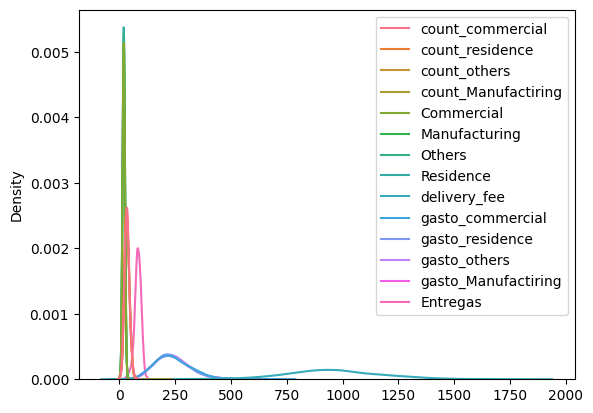

In [ ]:
sns.kdeplot(df_escalado)
plt.show

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_escalado.shape

(2357, 14)

In [ ]:
array = df_escalado.values

In [ ]:
x_classe = array[ : , 0:13]
y_classe = array[ : , 13]

In [ ]:
featuresx=x_classe
featuresy=y_classe

scaler=MinMaxScaler(feature_range=(0,1))
rescalerx=scaler.fit_transform(featuresx)
y_scaled = scaler.fit_transform(y_classe.reshape(-1, 1))
rescalerx

array([[0.175     , 0.43421053, 0.35064935, ..., 0.31881102, 0.17654279,
        0.26922413],
       [0.175     , 0.52631579, 0.37662338, ..., 0.2495212 , 0.4080322 ,
        0.26239342],
       [0.4125    , 0.51315789, 0.25974026, ..., 0.28066269, 0.25218359,
        0.33808081],
       ...,
       [0.3       , 0.30263158, 0.50649351, ..., 0.38061131, 0.4145687 ,
        0.46166167],
       [0.475     , 0.28947368, 0.37662338, ..., 0.27712813, 0.52303477,
        0.42802632],
       [0.2125    , 0.36842105, 0.09090909, ..., 0.26616633, 0.19752241,
        0.35488278]])

In [ ]:
columns = list(df_escalado.columns)
columns

['count_commercial',
 'count_residence',
 'count_others',
 'count_Manufactiring',
 'Commercial',
 'Manufacturing',
 'Others',
 'Residence',
 'delivery_fee',
 'gasto_commercial',
 'gasto_residence',
 'gasto_others',
 'gasto_Manufactiring',
 'Entregas']

In [ ]:
df_scaled = pd.DataFrame(data=rescalerx,columns=['count_commercial',
 'count_residence',
 'count_others',
 'count_Manufactiring',
 'Commercial',
 'Manufacturing',
 'Others',
 'Residence',
 'delivery_fee',
 'gasto_commercial',
 'gasto_residence',
 'gasto_others',
 'gasto_Manufactiring'])

In [ ]:
df_target=pd.DataFrame(data=y_scaled,columns=['Entregas'])
df_target

,Entregas
0,0.466667
1,0.441667
2,0.641667
3,0.566667
4,0.475000
...,...
2352,0.558333
2353,0.525000
2354,0.625000
2355,0.566667


# Regresion Lineal

In [ ]:
modelescalado = LinearRegression().fit(df_scaled, df_target)

In [ ]:
Xe = df_scaled # selecciona la columna x como característica
ye = df_target # selecciona la columna y como variable objetivo
X_traine, X_teste, y_traine, y_teste = train_test_split(Xe, ye, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_prede = modelescalado.predict(X_teste)
mse = mean_squared_error(y_teste, y_prede)
r2 = r2_score(y_teste, y_prede)
print("MSE:", mse)
print("R^2:", r2)

MSE: 2.5572840551818056e-32
R^2: 1.0


In [ ]:
X_pruebae = np.random.rand(15, 13)


In [ ]:
y_pred_escalado = modelescalado.predict(X_pruebae)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
y_pred = scaler.inverse_transform(y_pred_escalado)


In [ ]:
y_pred

array([[117.00093728],
       [ 68.79235393],
       [ 69.50439663],
       [ 95.24582421],
       [ 52.5467125 ],
       [106.23803397],
       [ 58.57731886],
       [104.84552662],
       [101.30159068],
       [113.29085261],
       [109.26361261],
       [102.46925925],
       [ 69.20723619],
       [ 55.71490459],
       [ 83.83916856]])

# Regresion Logistica 

In [ ]:
df_log_group

,count_commercial,count_residence,count_others,count_Manufactiring,Manufacturing,Others,Residence,delivery_fee,gasto_commercial,gasto_residence,gasto_others,gasto_Manufactiring,Entregas,superior_promedio
pickup_datetime,,,,,,,,,,,,,,
2009-01-01,17,35,31,30,18,17,17,621.20,88.10,212.85,148.80,171.45,11,0
2009-01-02,17,42,33,21,16,17,18,739.55,93.10,168.35,311.00,167.10,9,0
2009-01-03,36,41,24,46,24,15,22,935.70,330.25,188.35,201.80,215.30,23,1
2009-01-04,45,34,31,22,15,16,19,733.30,240.75,232.85,111.90,147.80,25,1
2009-01-05,35,26,15,33,21,11,14,550.95,176.65,101.40,100.05,172.85,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-11,37,42,19,31,20,11,21,1144.53,369.29,255.58,146.54,373.12,22,1
2015-06-12,28,23,18,30,18,13,18,921.74,268.08,187.50,217.58,248.58,21,0
2015-06-13,27,25,43,31,21,24,19,1047.66,185.54,252.54,315.58,294.00,18,0


In [ ]:
df_log_group.shape


(2357, 14)

In [ ]:
array2 = df_log_group.values

In [ ]:
x_classe2 = array2[ : , 0:13]
y_classe2 = array2[ : , 13]

In [ ]:
featuresx2=x_classe2
featuresy2=y_classe2

scaler=MinMaxScaler(feature_range=(0,1))
rescalerx2=scaler.fit_transform(featuresx2)
y_scaled2 = scaler.fit_transform(y_classe2.reshape(-1, 1))
rescalerx2

array([[0.175     , 0.43421053, 0.35064935, ..., 0.17654279, 0.26922413,
        0.2       ],
       [0.175     , 0.52631579, 0.37662338, ..., 0.4080322 , 0.26239342,
        0.15      ],
       [0.4125    , 0.51315789, 0.25974026, ..., 0.25218359, 0.33808081,
        0.5       ],
       ...,
       [0.3       , 0.30263158, 0.50649351, ..., 0.4145687 , 0.46166167,
        0.375     ],
       [0.475     , 0.28947368, 0.37662338, ..., 0.52303477, 0.42802632,
        0.475     ],
       [0.2125    , 0.36842105, 0.09090909, ..., 0.19752241, 0.35488278,
        0.375     ]])

In [ ]:
df_log_group.columns

Index(['count_commercial', 'count_residence', 'count_others',
       'count_Manufactiring', 'Manufacturing', 'Others', 'Residence',
       'delivery_fee', 'gasto_commercial', 'gasto_residence', 'gasto_others',
       'gasto_Manufactiring', 'Entregas', 'superior_promedio'],
      dtype='object')

In [ ]:
df_scaled2 = pd.DataFrame(data=rescalerx2,columns=['count_commercial', 'count_residence', 'count_others',
       'count_Manufactiring', 'Manufacturing', 'Others', 'Residence',
       'delivery_fee', 'gasto_commercial', 'gasto_residence', 'gasto_others',
       'gasto_Manufactiring', 'Entregas'])

In [ ]:
df_target2=pd.DataFrame(data=y_scaled2,columns=['superior_promedio'])
df_target2

,superior_promedio
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
2352,1.0
2353,0.0
2354,0.0
2355,1.0


In [ ]:
Xe2 = df_scaled2 # selecciona la columna x como característica
ye2 = df_target2 # selecciona la columna y como variable objetivo
X_traine2, X_teste2, y_traine2, y_teste2 = train_test_split(Xe2, ye2, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Entrenar el modelo de regresión logística en el conjunto de entrenamiento
lr = LogisticRegression()
lr.fit(X_traine2, y_traine2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluar la precisión del modelo en el conjunto de prueba
y_prede2 = lr.predict(X_teste2)
accuracy = accuracy_score(y_teste2, y_prede2)
print('Precisión del modelo: {:.2f}'.format(accuracy))

Precisión del modelo: 0.96


In [ ]:
X_pruebae2 = np.random.rand(15, 13)


In [ ]:
y_pred_escalado2 = lr.predict(X_pruebae2)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
y_pred_escalado2

array([0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.])